# Wind Energy Prediction and Analysis

## Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

%matplotlib inline
sns.set(rc = {"figure.figsize" : (8, 6)})

### Reading the dataset

In [4]:
data = pd.read_csv("T1.csv")

data.head(20)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785


## Data Wrangling

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13807 entries, 0 to 13806
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      13807 non-null  object 
 1   LV ActivePower (kW)            13806 non-null  float64
 2   Wind Speed (m/s)               13806 non-null  float64
 3   Theoretical_Power_Curve (KWh)  13806 non-null  float64
 4   Wind Direction (°)             13806 non-null  float64
dtypes: float64(4), object(1)
memory usage: 539.5+ KB


In [7]:
data.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,13806.000000,13806.000000,13806.000000,13806.000000
mean,1504.666350,8.623352,1768.204166,160.019428
std,1458.142278,5.037649,1458.576222,82.159152
min,-2.471405,0.000000,0.000000,0.000000
25%,0.000000,4.426302,206.561100,72.555202
50%,1014.772491,8.098982,1587.178798,190.683701
75%,3275.411133,11.960982,3515.751923,211.679779
max,3605.758057,25.206011,3600.000000,359.914398


In [8]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              1
Wind Speed (m/s)                 1
Theoretical_Power_Curve (KWh)    1
Wind Direction (°)               1
dtype: int64

## Visualization

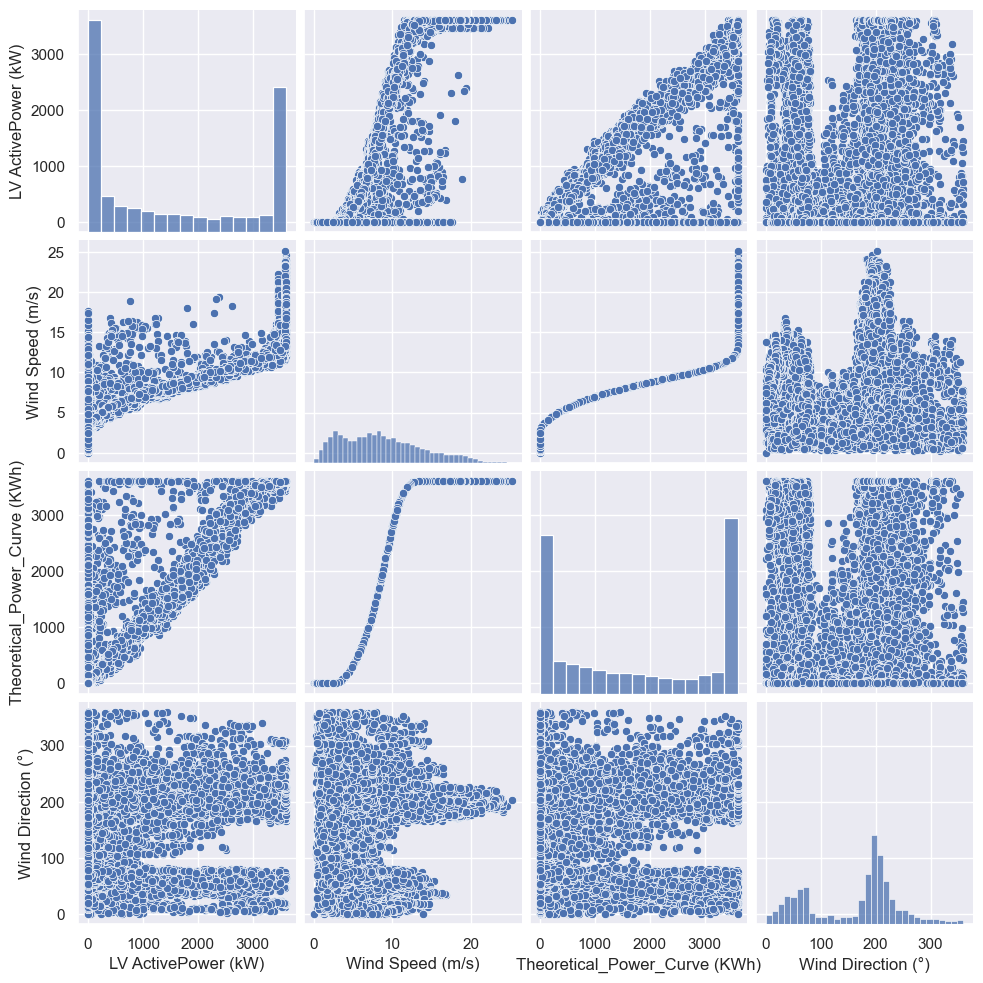

In [15]:
# Pair Plot correlation between all attributes
sns.pairplot(data)

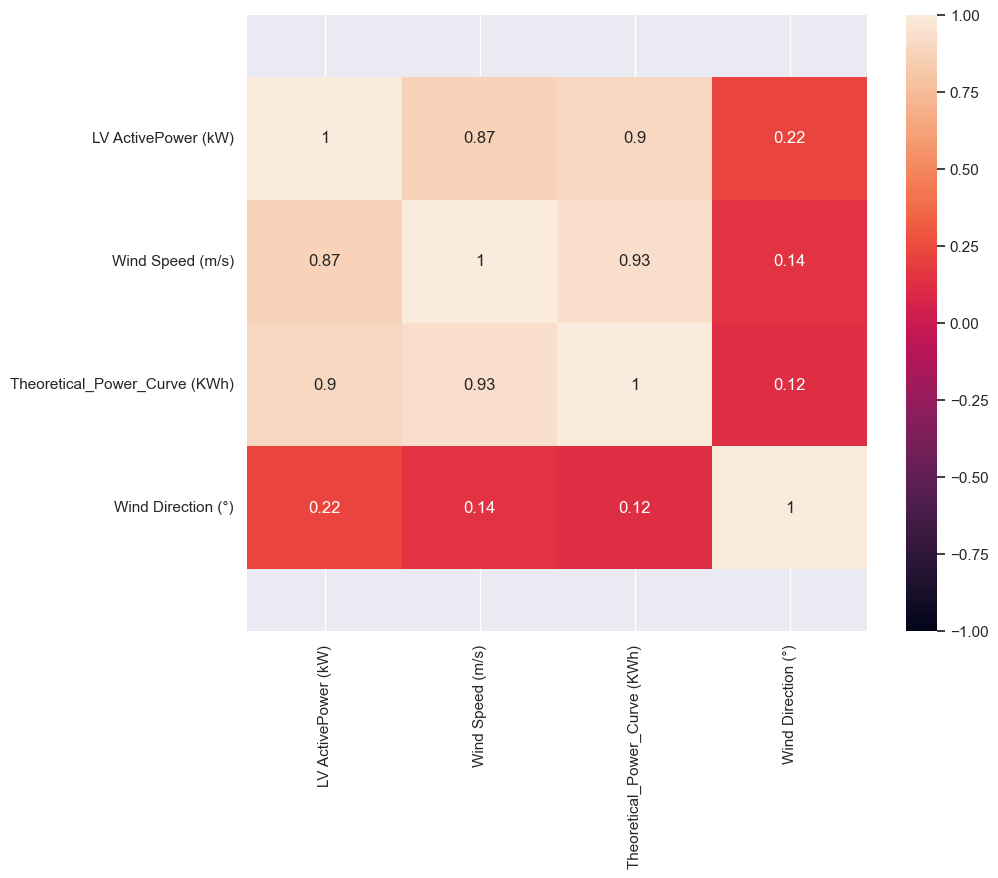

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.870086,0.896526,0.219827
Wind Speed (m/s),0.870086,1.000000,0.933036,0.141206
Theoretical_Power_Curve (KWh),0.896526,0.933036,1.000000,0.121514
Wind Direction (°),0.219827,0.141206,0.121514,1.000000


In [16]:
#correlation between the values
numeric_data = data.select_dtypes(include=[np.number])

corr = numeric_data.corr()

plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr


In [17]:
# Importing a visualization library
! pip install windrose

### Pie Bar Chart (Wind Direction VS Wind Speed)

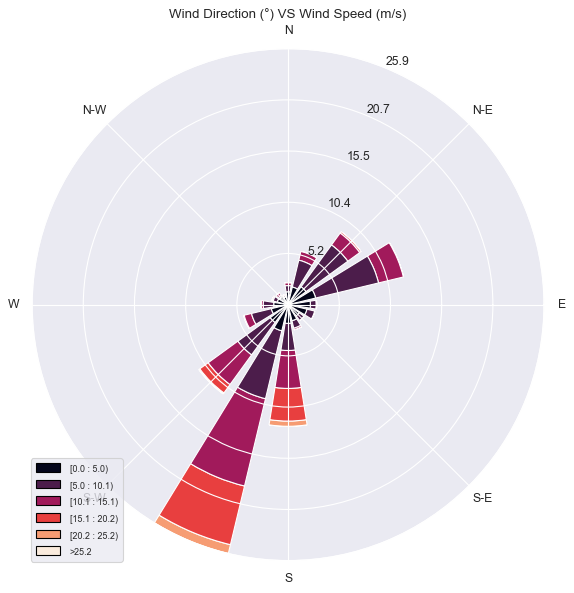

In [19]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(data['Wind Direction (°)'], data['Wind Speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

In [20]:
# Spliting the date time in year, month, days, hours and minutes
def safe_parse_datetime(x):
    try:
        return time.strptime(x, "%d %m %Y %H:%M")
    except ValueError:
        return None

data['Parsed_DateTime'] = data['Date/Time'].apply(safe_parse_datetime)

data = data.dropna(subset=['Parsed_DateTime'])

data['Year'] = data['Parsed_DateTime'].apply(lambda x: x.tm_year)
data['Month'] = data['Parsed_DateTime'].apply(lambda x: x.tm_mon)
data['Day'] = data['Parsed_DateTime'].apply(lambda x: x.tm_mday)
data['Time_Hours'] = data['Parsed_DateTime'].apply(lambda x: x.tm_hour)
data['Time_Minutes'] = data['Parsed_DateTime'].apply(lambda x: x.tm_min)

data.head(10)

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/14379739.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Parsed_DateTime'].apply(lambda x: x.tm_year)
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/14379739.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Parsed_DateTime'].apply(lambda x: x.tm_mon)
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/14379739.py:14: SettingWithCopyWarning: 
A value is trying to be

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Parsed_DateTime,Year,Month,Day,Time_Hours,Time_Minutes
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,"(2018, 1, 1, 0, 0, 0, 0, 1, -1)",2018,1,1,0,0
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,"(2018, 1, 1, 0, 10, 0, 0, 1, -1)",2018,1,1,0,10
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,"(2018, 1, 1, 0, 20, 0, 0, 1, -1)",2018,1,1,0,20
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,"(2018, 1, 1, 0, 30, 0, 0, 1, -1)",2018,1,1,0,30
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,"(2018, 1, 1, 0, 40, 0, 0, 1, -1)",2018,1,1,0,40
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,"(2018, 1, 1, 0, 50, 0, 0, 1, -1)",2018,1,1,0,50
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,"(2018, 1, 1, 1, 0, 0, 0, 1, -1)",2018,1,1,1,0
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,"(2018, 1, 1, 1, 10, 0, 0, 1, -1)",2018,1,1,1,10
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,"(2018, 1, 1, 1, 20, 0, 0, 1, -1)",2018,1,1,1,20
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,"(2018, 1, 1, 1, 30, 0, 0, 1, -1)",2018,1,1,1,30


### KDE Plot

/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/3400985305.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/3400985305.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/3400985305.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.iloc[:,i+1], shade=True)
/var/folders/zz/1mt370gd1tx6gr37rqfyr3x00000gn/T/ipykernel_4483/3400985305.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

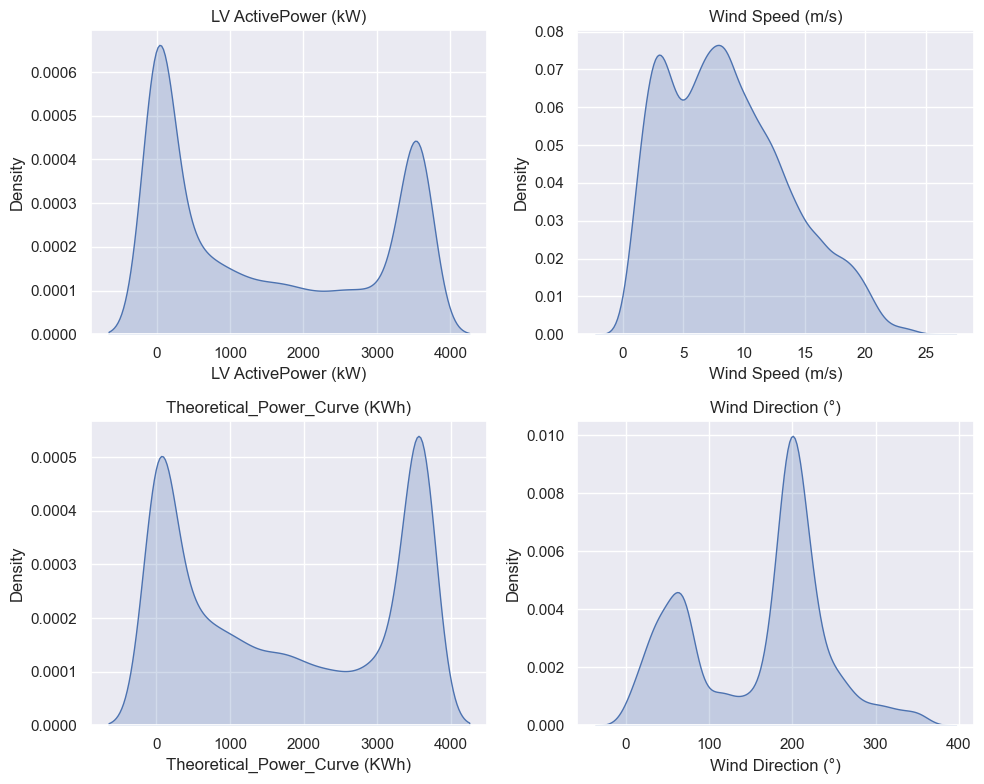

In [24]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data.iloc[:,i+1], shade=True)
    plt.title(data.columns[i+1])
plt.tight_layout()
plt.show()

In [25]:
# droping all the null values from the data
data = data.dropna()

## Converting the Data/Time feature in proper DateTime format

In [27]:
data["Date/Time"] = pd.to_datetime(data["Date/Time"], format = "%d %m %Y %H:%M", errors = "coerce")
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Parsed_DateTime,Year,Month,Day,Time_Hours,Time_Minutes
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,"(2018, 1, 1, 0, 0, 0, 0, 1, -1)",2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,"(2018, 1, 1, 0, 10, 0, 0, 1, -1)",2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,"(2018, 1, 1, 0, 20, 0, 0, 1, -1)",2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,"(2018, 1, 1, 0, 30, 0, 0, 1, -1)",2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,"(2018, 1, 1, 0, 40, 0, 0, 1, -1)",2018,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...,...
13801,2018-04-11 08:20:00,0.000000,1.054580,0.000000,268.874115,"(2018, 4, 11, 8, 20, 0, 2, 101, -1)",2018,4,11,8,20
13802,2018-04-11 08:30:00,0.000000,1.738053,0.000000,231.740494,"(2018, 4, 11, 8, 30, 0, 2, 101, -1)",2018,4,11,8,30
13803,2018-04-11 08:40:00,0.000000,2.404213,0.000000,200.535904,"(2018, 4, 11, 8, 40, 0, 2, 101, -1)",2018,4,11,8,40
13804,2018-04-11 08:50:00,0.000000,2.817328,0.000000,198.145203,"(2018, 4, 11, 8, 50, 0, 2, 101, -1)",2018,4,11,8,50


### Line Graph of DateTime VS Target variable

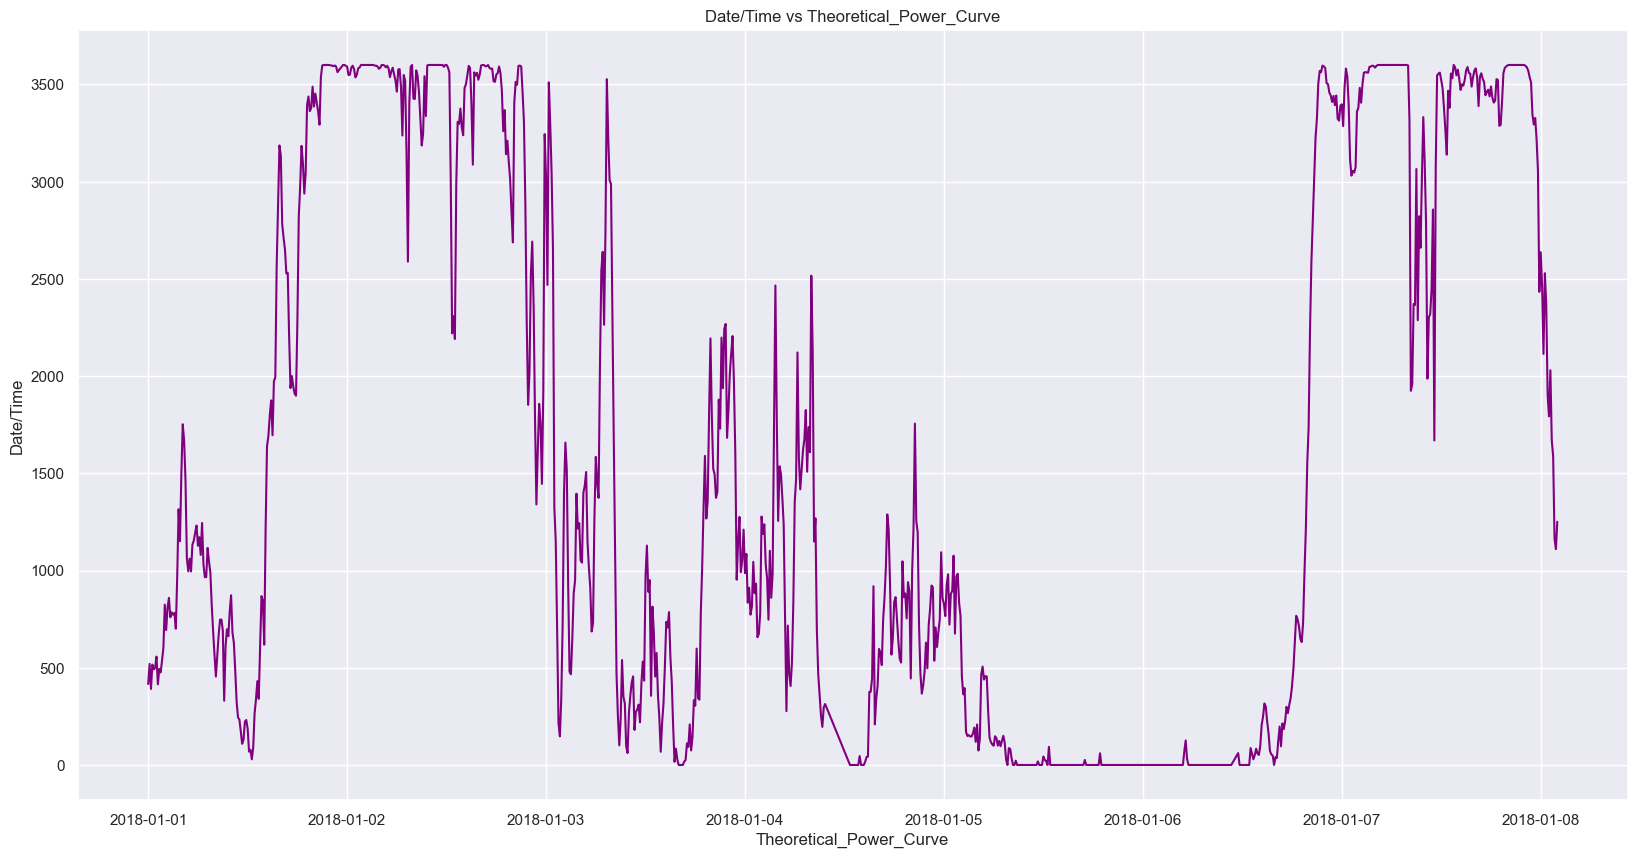

In [30]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(data['Date/Time'][0:1000],
        data['Theoretical_Power_Curve (KWh)'][0:1000],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Theoretical_Power_Curve",
       ylabel="Date/Time",
       title="Date/Time vs Theoretical_Power_Curve")

plt.show()

In [33]:
# Droping all the irrelavent features that dosent affect the target variable.
cols = ["Wind Direction (°)", 'Year', 'Month', "Day", "Time_Hours", "Time_Minutes" ]
data = data.drop(cols, axis=1)
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Parsed_DateTime
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,"(2018, 1, 1, 0, 0, 0, 0, 1, -1)"
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,"(2018, 1, 1, 0, 10, 0, 0, 1, -1)"
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,"(2018, 1, 1, 0, 20, 0, 0, 1, -1)"
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,"(2018, 1, 1, 0, 30, 0, 0, 1, -1)"
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,"(2018, 1, 1, 0, 40, 0, 0, 1, -1)"


In [34]:
df = data.copy()

# Building the LSTM model

In [42]:
from pandas import DataFrame, Series, concat, read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [43]:
# converting the Data/Time as the index for proper shape of the input.
# Print column names to check for issues
print("Column names:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the correct column name
print("Column names after stripping:", df.columns)

# Set the index using the corrected column name
if 'Date/Time' in df.columns:
    df = df.set_index('Date/Time')
else:
    print("The column 'Date/Time' does not exist.")



Column names: Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Parsed_DateTime'],
      dtype='object')
Column names after stripping: Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Parsed_DateTime'],
      dtype='object')


In [44]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 15
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [45]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [46]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [47]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [48]:
# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

In [49]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [50]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)

In [51]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]

In [52]:
# Inspect column names to verify their presence
print("Columns before dropping:", df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop columns, ignoring errors if columns do not exist
df = df.drop(['LV ActivePower (kW)', 'Wind Speed (m/s)'], axis=1, errors='ignore')

# Check the DataFrame after dropping columns
print(df.head())

Columns before dropping: Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Parsed_DateTime'],
      dtype='object')
                     Theoretical_Power_Curve (KWh)  \
Date/Time                                            
2018-01-01 00:00:00                     416.328908   
2018-01-01 00:10:00                     519.917511   
2018-01-01 00:20:00                     390.900016   
2018-01-01 00:30:00                     516.127569   
2018-01-01 00:40:00                     491.702972   

                                      Parsed_DateTime  
Date/Time                                              
2018-01-01 00:00:00   (2018, 1, 1, 0, 0, 0, 0, 1, -1)  
2018-01-01 00:10:00  (2018, 1, 1, 0, 10, 0, 0, 1, -1)  
2018-01-01 00:20:00  (2018, 1, 1, 0, 20, 0, 0, 1, -1)  
2018-01-01 00:30:00  (2018, 1, 1, 0, 30, 0, 0, 1, -1)  
2018-01-01 00:40:00  (2018, 1, 1, 0, 40, 0, 0, 1, -1)  


In [53]:
for i in range(0,10):
  df = df[:-1]
df.tail()

,Theoretical_Power_Curve (KWh),Parsed_DateTime
Date/Time,,
2018-04-11 06:40:00,0.0,"(2018, 4, 11, 6, 40, 0, 2, 101, -1)"
2018-04-11 06:50:00,0.0,"(2018, 4, 11, 6, 50, 0, 2, 101, -1)"
2018-04-11 07:00:00,0.0,"(2018, 4, 11, 7, 0, 0, 2, 101, -1)"
2018-04-11 07:10:00,0.0,"(2018, 4, 11, 7, 10, 0, 2, 101, -1)"
2018-04-11 07:20:00,0.0,"(2018, 4, 11, 7, 20, 0, 2, 101, -1)"


In [54]:
# transform data to be stationary
  

data = {'time_column': ['2023-11-24 12:34:56', '2023-11-24 13:01:23', '2023-11-24 14:15:45']}
df = pd.DataFrame(data)

df['time_column'] = pd.to_datetime(df['time_column'])
raw_values = df['time_column'].astype(np.int64) // 10**9
diff_values = np.diff(raw_values)

print(diff_values)  # Output: [1627, 4422]



[1587 4462]


In [55]:
# transform data to be supervised learning

supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values


In [56]:
# split data into train and test-sets
# Example: Define supervised_values as a list or numpy array
import numpy as np

# Assuming supervised_values is a list of values or a numpy array
supervised_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Define the number of elements to use for prediction (testing)
predict_values_exp = 3

# Split the data into training and testing datasets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

print("Train:", train)
print("Test:", test)

Train: [1 2 3 4 5 6 7]
Test: [ 8  9 10]


In [57]:
# transform the scale of the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Example: Define supervised_values as a list or numpy array
supervised_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Define the number of elements to use for prediction (testing)
predict_values_exp = 3

# Split the data into training and testing datasets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

# Function to scale the data
def scale(train, test):
    # Initialize the scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Fit the scaler on the training data and transform both train and test datasets
    train_scaled = scaler.fit_transform(train.reshape(-1, 1))
    test_scaled = scaler.transform(test.reshape(-1, 1))
    
    return scaler, train_scaled, test_scaled

# Use the scale function
scaler, train_scaled, test_scaled = scale(train, test)

print("Train Scaled:", train_scaled)
print("Test Scaled:", test_scaled)


Train Scaled: [[0.        ]
 [0.16666667]
 [0.33333333]
 [0.5       ]
 [0.66666667]
 [0.83333333]
 [1.        ]]
Test Scaled: [[1.16666667]
 [1.33333333]
 [1.5       ]]


In [58]:
# fit the model
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Example data
supervised_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
predict_values_exp = 3

# Split into train and test datasets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

# Scale the data
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train.reshape(-1, 1))
    test_scaled = scaler.transform(test.reshape(-1, 1))
    return scaler, train_scaled, test_scaled

scaler, train_scaled, test_scaled = scale(train, test)

# Prepare the input data for LSTM
def prepare_data(data):
    X, y = data[:-1], data[1:]
    X = X.reshape((X.shape[0], 1, 1))  # Reshape to (samples, timesteps, features)
    return X, y

# Prepare train and test data
X_train, y_train = prepare_data(train_scaled)
X_test, y_test = prepare_data(test_scaled)

# Define and fit the LSTM model
def fit_lstm(X, y, batch_size, epochs, neurons):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X.shape[1], X.shape[2]), stateful=False))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)
    
    return model

# Example values for batch_size, epochs, and neurons
batch_size_exp = 1
epoch_exp = 100
neurons_exp = 4

# Fit the LSTM model on the training data
lstm_model = fit_lstm(X_train, y_train, batch_size_exp, epoch_exp, neurons_exp)

# Optionally, you can make predictions on the test set using the trained model
y_pred = lstm_model.predict(X_test, batch_size=batch_size_exp)
y_pred_rescaled = scaler.inverse_transform(y_pred)

print("Test Predictions:", y_pred_rescaled)




Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 1s - 88ms/step - loss: 0.3252
Epoch 2/100
6/6 - 0s - 2ms/step - loss: 0.3122
Epoch 3/100
6/6 - 0s - 2ms/step - loss: 0.2996
Epoch 4/100
6/6 - 0s - 2ms/step - loss: 0.2872
Epoch 5/100
6/6 - 0s - 2ms/step - loss: 0.2752
Epoch 6/100
6/6 - 0s - 2ms/step - loss: 0.2635
Epoch 7/100
6/6 - 0s - 2ms/step - loss: 0.2521
Epoch 8/100
6/6 - 0s - 2ms/step - loss: 0.2410
Epoch 9/100
6/6 - 0s - 2ms/step - loss: 0.2303
Epoch 10/100
6/6 - 0s - 2ms/step - loss: 0.2199
Epoch 11/100
6/6 - 0s - 2ms/step - loss: 0.2098
Epoch 12/100
6/6 - 0s - 2ms/step - loss: 0.2000
Epoch 13/100
6/6 - 0s - 3ms/step - loss: 0.1905
Epoch 14/100
6/6 - 0s - 2ms/step - loss: 0.1813
Epoch 15/100
6/6 - 0s - 2ms/step - loss: 0.1724
Epoch 16/100
6/6 - 0s - 2ms/step - loss: 0.1638
Epoch 17/100
6/6 - 0s - 2ms/step - loss: 0.1555
Epoch 18/100
6/6 - 0s - 2ms/step - loss: 0.1475
Epoch 19/100
6/6 - 0s - 2ms/step - loss: 0.1398
Epoch 20/100
6/6 - 0s - 2ms/step - loss: 0.1323
Epoch 21/100
6/6 - 0s - 2ms/step - loss: 0.1252
Epoch 22/100

In [59]:
# walk-forward validation on the test data
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Example data
supervised_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
predict_values_exp = 3

# Split into train and test datasets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

# Scale the data
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train.reshape(-1, 1))
    test_scaled = scaler.transform(test.reshape(-1, 1))
    return scaler, train_scaled, test_scaled

scaler, train_scaled, test_scaled = scale(train, test)

# Prepare the input data for LSTM
def prepare_data(data):
    X, y = data[:-1], data[1:]
    X = X.reshape((X.shape[0], 1, 1))  # Reshape to (samples, timesteps, features)
    return X, y

# Prepare train and test data
X_train, y_train = prepare_data(train_scaled)
X_test, y_test = prepare_data(test_scaled)

# Define and fit the LSTM model
def fit_lstm(X, y, batch_size, epochs, neurons):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(X.shape[1], X.shape[2]), stateful=False))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=2, shuffle=False)
    
    return model

# Example values for batch_size, epochs, and neurons
batch_size_exp = 1
epoch_exp = 100
neurons_exp = 4

# Fit the LSTM model on the training data
lstm_model = fit_lstm(X_train, y_train, batch_size_exp, epoch_exp, neurons_exp)

# Forecasting function
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))  # Reshape for the model input
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# Invert scaling function
def invert_scale(scaler, X, value):
    new_row = np.append(X, value)
    array = new_row.reshape(1, len(new_row))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# Invert differencing function
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# Define raw values and lag
raw_values = supervised_values
lag_exp = 1

# Initialize lists for storing results
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()

# Perform predictions
for i in range(len(test_scaled)):
    # Make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    
    # Replace value in test_scaled with the predicted value
    test_scaled[i] = np.append(X, yhat)
    
    # Invert scaling
    yhat = invert_scale(scaler, X, yhat)
    
    # Invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    
    # Store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 - 0s - 66ms/step - loss: 0.3785
Epoch 2/100
6/6 - 0s - 2ms/step - loss: 0.3685
Epoch 3/100
6/6 - 0s - 1ms/step - loss: 0.3587
Epoch 4/100
6/6 - 0s - 2ms/step - loss: 0.3491
Epoch 5/100
6/6 - 0s - 2ms/step - loss: 0.3395
Epoch 6/100
6/6 - 0s - 2ms/step - loss: 0.3301
Epoch 7/100
6/6 - 0s - 2ms/step - loss: 0.3208
Epoch 8/100
6/6 - 0s - 2ms/step - loss: 0.3117
Epoch 9/100
6/6 - 0s - 2ms/step - loss: 0.3026
Epoch 10/100
6/6 - 0s - 2ms/step - loss: 0.2937
Epoch 11/100
6/6 - 0s - 2ms/step - loss: 0.2849
Epoch 12/100
6/6 - 0s - 2ms/step - loss: 0.2763
Epoch 13/100
6/6 - 0s - 2ms/step - loss: 0.2677
Epoch 14/100
6/6 - 0s - 2ms/step - loss: 0.2593
Epoch 15/100
6/6 - 0s - 2ms/step - loss: 0.2510
Epoch 16/100
6/6 - 0s - 2ms/step - loss: 0.2428
Epoch 17/100
6/6 - 0s - 2ms/step - loss: 0.2347
Epoch 18/100
6/6 - 0s - 2ms/step - loss: 0.2268
Epoch 19/100
6/6 - 0s - 1ms/step - loss: 0.2189
Epoch 20/100
6/6 - 0s - 2ms/step - loss: 0.2112
Epoch 21/100
6/6 - 0s - 2ms/step - loss: 0.2037
Epoch 22/100

ValueError: Exception encountered when calling LSTMCell.call().

[1mDimensions must be equal, but are 0 and 1 for '{{node sequential_1_1/lstm_1_1/lstm_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_1_1/lstm_1_1/strided_slice_1, sequential_1_1/lstm_1_1/lstm_cell_1/Cast/ReadVariableOp)' with input shapes: [1,0], [1,16].[0m

Arguments received by LSTMCell.call():
  • inputs=tf.Tensor(shape=(1, 0), dtype=float32)
  • states=('tf.Tensor(shape=(1, 4), dtype=float32)', 'tf.Tensor(shape=(1, 4), dtype=float32)')
  • training=False

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Example data
supervised_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
predict_values_exp = 3

# Split into train and test datasets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]

# Scale the data
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train.reshape(-1, 1))
    test_scaled = scaler.transform(test.reshape(-1, 1))
    return scaler, train_scaled, test_scaled

scaler, train_scaled, test_scaled = scale(train, test)

# Prepare the input data for LSTM
def prepare_data(data):
    X, y


## Calculating Mean Absolute Error

In [ ]:
import numpy as np

expectations = np.array([10, 20, 30, 0, 5])  # Example data with a zero value
predictions = np.array([12, 18, 32, 1, 4])

# Handle potential division by zero with epsilon
epsilon = 1e-8
mape = np.mean(np.abs((expectations - predictions) / (expectations + epsilon)))

print("Mean Absolute Percent Error:", mape)


# Final Prediction Plot

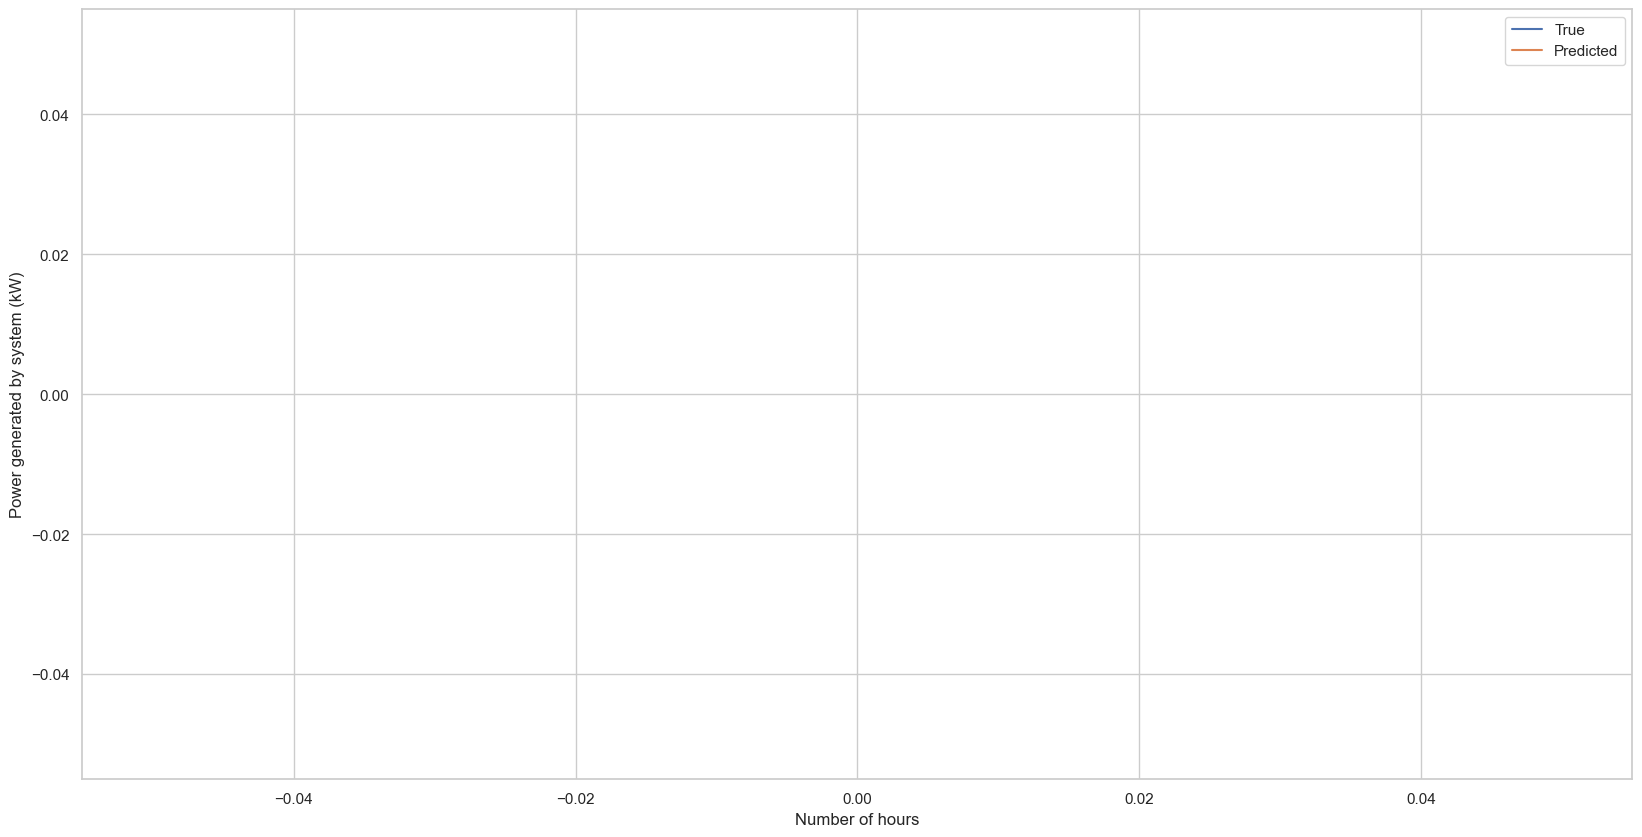

In [62]:
# line plot of observed vs predicted
import matplotlib.pyplot as plt
import seaborn as sns

# Example plotting code
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(expectations_plot[0:100], label="True")
plt.plot(predictions_plot[0:100], label="Predicted")
plt.legend(loc='upper right')
plt.xlabel("Number of hours")
plt.ylabel("Power generated by system (kW)")
plt.show()
